# SyriaTel customer churn prediction

### Introduction

SyriaTel is a prominent telecommunications company. It is experiencing a challenge of high customer churn. In order
to mitigate financial losses and ensure the organization's long-term stability, we are tasked to create a model that predicts customers' churn through the identification of related
patterns and influential factors. Consequently, the company can proactively implement strategies
informed by these findings to preserve its customer base and ensured sustained growth.


### Data understanding
This project utilizes data from SyriaTel's customer churn records. The dataset includes various attributes about customers, organized into columns such as:

- State
- Account Length
- Area Code
- Phone Number
- International Plan
- Voice Mail Plan
- Number of Voicemail Messages
- Total Day Minutes, Calls, and Charges
- Total Evening Minutes, Calls, and Charges
- Total Night Minutes, Calls, and Charges
- Total International Minutes, Calls, and Charges
- Customer Service Calls
- Churn

These attributes provide detailed insights into customer behavior and usage patterns, which are used for churn prediction.

### Business problem
The telecommunications industry is highly competitive, and SyriaTel is facing challenges related to customer churn, which can significantly impact the company's growth and financial stability. Each customer disconnection not only represents a loss but also poses a threat to the company's long-term success. By analyzing the factors and patterns driving churn, and developing an effective classification model to predict customer attrition, SyriaTel can take proactive steps to retain its customers and secure its future success.

### Objective
To construct a predictive model using the available dataset to categorize customers as either having
churned or remained with the company.

To evaluate the model performance using appropriate/reliable evaluation metrics such as accuracy,
precision, recall, and F1-score. 

To identify any noticeable patterns or trends linked to customers' churn.

To identify the specific features that have a significant impact on the
customer churn rate in SyriaTel, provide valuable recommendations based on the findings hence help
to mitigate churn rates in the company and improve customer retention.

### Project's Metric of Success
- The project seeks to build a machine learning model with an accuracy score of above 75%.


### Importing the required libraries

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
#loading the data
DF= pd.read_csv('SyriaTel.csv')
DF.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
DF.shape
print(f'The data has {DF.shape[0]} rows and {DF.shape[1]} coulums')

The data has 3333 rows and 21 coulums


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
#checking the colums in the data frame
DF.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [6]:
#checking for missing values
DF.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

The data doesn't have missing values

In [7]:
#checking for duplicates
DF.duplicated().sum()

0

In [8]:
# data summary
DF.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Selecting the features

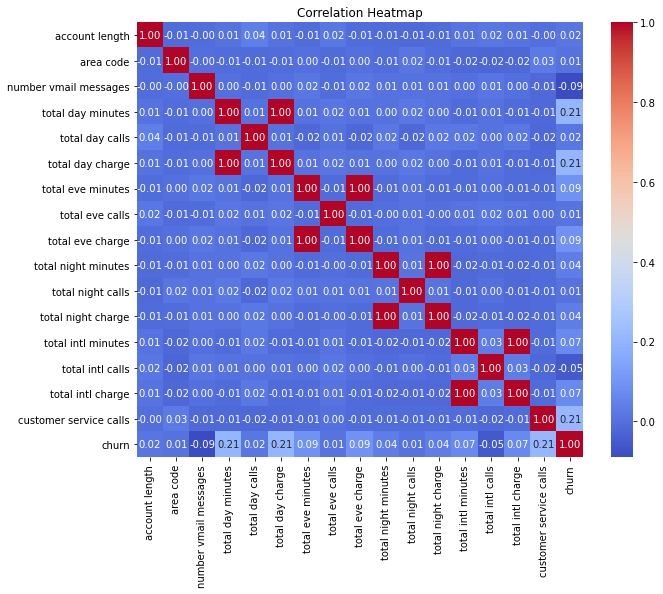

In [9]:
#We will use correlation to drop colums with perfect correlation as this could lead to unreliable results
correlation_matrix = DF.corr()

plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
#drop columns with perfect correlation and columns which are not significant in determining customer churn 
df = DF.drop(['total day minutes', 'total eve minutes', 'total night minutes',  'total intl minutes', 'area code', 'phone number', 'state'], axis=1)
df.head()

,account length,international plan,voice mail plan,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn
0,128,no,yes,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False
1,107,no,yes,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False
2,137,no,no,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False
3,84,yes,no,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False
4,75,yes,no,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False


### Data analysis

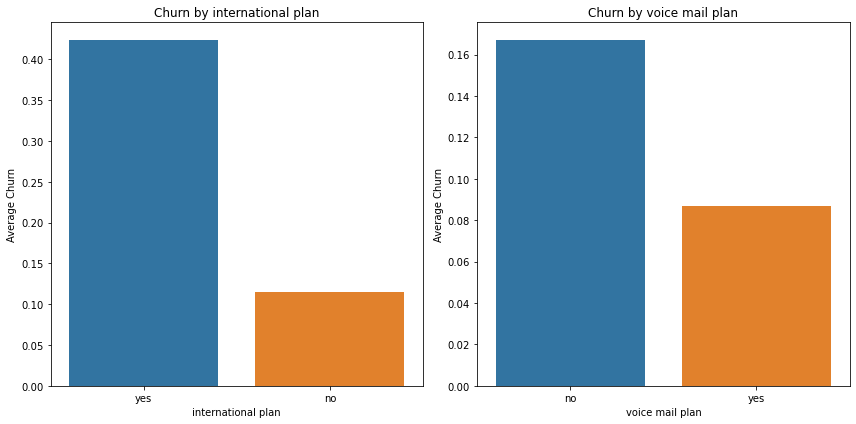

In [11]:
#visualizing churn rate against categorical columns

categorical_columns = ['international plan', 'voice mail plan']

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(12, 6))

# If there's only one column, `axes` will be an array, so handle both cases
if len(categorical_columns) == 1:
    axes = [axes]

# Loop through categorical columns to create a bar plot for each one
for i, column in enumerate(categorical_columns):
    grouped_data = df.groupby(column)['churn'].mean().sort_values(ascending=False)
    sns.barplot(x=grouped_data.index, y=grouped_data.values, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Churn')
    axes[i].set_title(f'Churn by {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()



Clients who have subscribed to international plans have higher churn rate than those without such plans, indicating that international plan users are more likely to leave. 
Clients who do not have voice mail plans experience a significantly higher churn rate compared to those who are subscribed to voice mail services, suggesting that the lack of this feature may contribute to dissatisfaction and increased attrition. 

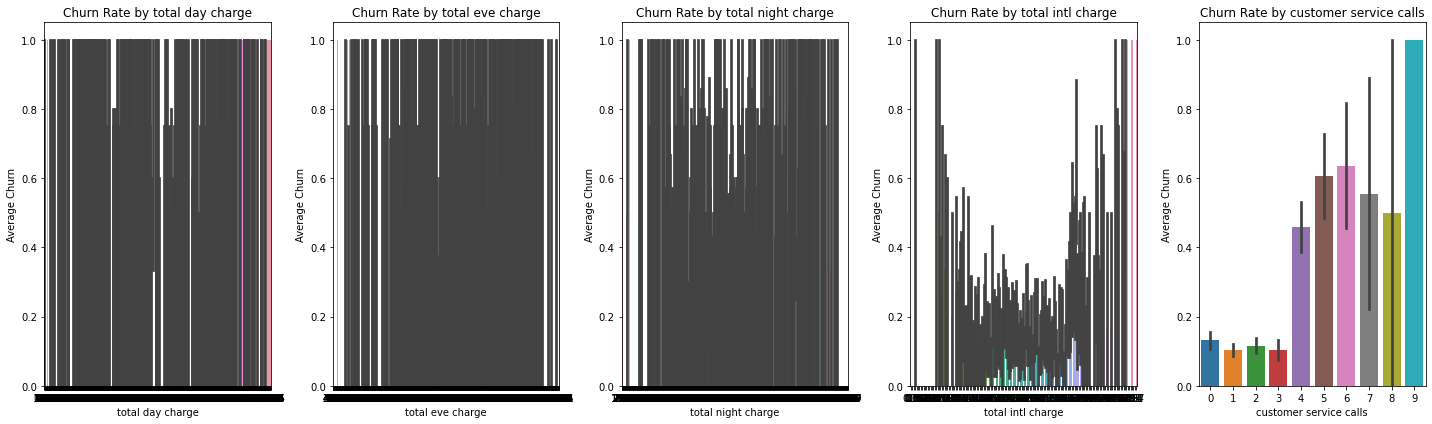

In [100]:
# Calculate churn rate for each combination of 'international plan' and 'voice mail plan'
churn_rate = df.groupby(['total day charge', 'total eve charge','total night charge','total intl charge',
                         'customer service calls'])['churn'].mean().reset_index()


# Create a figure and axes for plotting
fig, axes = plt.subplots(1, 5, figsize=(20, 6))
#fig, axes = plt.subplots(5, 1, figsize=(8, 20))
# List of columns to plot
columns = ['total day charge', 'total eve charge', 'total night charge', 
           'total intl charge', 'customer service calls']

# Loop through the columns to create a bar plot for each one
for i, column in enumerate(columns):
    # Sorting data for better visualization
    sorted_data = churn_rate.sort_values(by=column)
    
    # Plotting each column
    sns.barplot(x=sorted_data[column], y=sorted_data['churn'], ax=axes[i])
    
    # Setting labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Churn')
    axes[i].set_title(f'Churn Rate by {column}')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


There is a strong correlation between the total day, evening, and night charges, and a higher churn rate. However, this relationship is not as apparent with the international charge rate. Additionally, a higher number of customer service calls tends to be associated with an increased churn rate.

### One Hot Encoding

In [13]:
# Transform categorical columns by one-hot encoding
categorical_columns = ['international plan', 'voice mail plan']

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fitting and transforming the categorical columns
encoded_array = encoder.fit_transform(df[categorical_columns])

# Getting the feature names after one-hot encoding
feature_names = encoder.get_feature_names_out(input_features=categorical_columns)

# Converting the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=feature_names, index=df.index)

# Concatenating the encoded DataFrame with the remaining columns from the original DataFrame
new_df = pd.concat([df.drop(categorical_columns, axis=1), encoded_df], axis=1)

# Display the final DataFrame
new_df.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,churn,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,1,False,1.0,0.0,0.0,1.0
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,1,False,1.0,0.0,0.0,1.0
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,0,False,1.0,0.0,1.0,0.0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,2,False,0.0,1.0,1.0,0.0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,3,False,0.0,1.0,1.0,0.0


In [14]:
new_df.isna().sum()

account length            0
number vmail messages     0
total day calls           0
total day charge          0
total eve calls           0
total eve charge          0
total night calls         0
total night charge        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
international plan_no     0
international plan_yes    0
voice mail plan_no        0
voice mail plan_yes       0
dtype: int64

### Split into X and Y


In [15]:
#defining our x and y

x=new_df.drop(['churn'],axis=1)
y=new_df[['churn']]
x.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,128,25,110,45.07,99,16.78,91,11.01,3,2.70,1,1.0,0.0,0.0,1.0
1,107,26,123,27.47,103,16.62,103,11.45,3,3.70,1,1.0,0.0,0.0,1.0
2,137,0,114,41.38,110,10.30,104,7.32,5,3.29,0,1.0,0.0,1.0,0.0
3,84,0,71,50.90,88,5.26,89,8.86,7,1.78,2,0.0,1.0,1.0,0.0
4,75,0,113,28.34,122,12.61,121,8.41,3,2.73,3,0.0,1.0,1.0,0.0


In [16]:
y.head()

,churn
0,False
1,False
2,False
3,False
4,False


### split into x train and test sets

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(f'We are training {len(x_train)} values of x and testing {len(x_test)} values of x')
print(f'We are training {len(y_train)} values of y and testing {len(y_test)} values of y')
  

We are training 2666 values of x and testing 667 values of x
We are training 2666 values of y and testing 667 values of y


In [18]:
x_train.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
817,243,0,92,16.24,63,13.91,118,11.89,6,1.78,2,1.0,0.0,1.0,0.0
1373,108,0,105,19.04,110,16.46,93,9.40,4,1.11,4,1.0,0.0,1.0,0.0
679,75,0,78,37.81,111,27.80,104,9.36,9,2.35,1,0.0,1.0,1.0,0.0
56,141,0,98,21.57,62,15.30,128,6.34,2,2.16,1,1.0,0.0,1.0,0.0
1993,86,0,96,36.77,77,22.64,110,9.63,3,1.22,0,1.0,0.0,1.0,0.0


In [19]:
x_test.head()

,account length,number vmail messages,total day calls,total day charge,total eve calls,total eve charge,total night calls,total night charge,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
438,113,0,93,26.35,106,28.10,123,8.52,3,3.65,1,1.0,0.0,1.0,0.0
2674,67,0,117,18.55,124,18.48,141,8.48,6,3.46,0,1.0,0.0,1.0,0.0
1345,98,0,0,0.00,130,13.57,88,7.52,1,1.84,4,1.0,0.0,1.0,0.0
1957,147,0,79,36.18,91,17.35,113,7.03,2,2.75,1,1.0,0.0,1.0,0.0
2148,96,0,102,24.48,73,19.10,91,10.25,7,2.70,1,1.0,0.0,1.0,0.0


### Modeling

In this section we are going to model our sets using Logistic regression, Random forest and K-Nearest Neighbor


In [86]:
#our target is imbalanced hence the predictions may not be accurate. We can solve this by use of SMOTE
from imblearn.over_sampling import SMOTE
# Performing SMOTE oversampling on the training data
smote = SMOTE(random_state=42)
 
# Performing SMOTE oversampling on the training data
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


### Logistic Regression

In [85]:
# Initialize the logistic regression model
log_reg_smote = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model on the resampled training data
log_reg_smote.fit(x_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_smote = log_reg_smote.predict(x_test_scaled)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

# Classification Report
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_smote))

# Accuracy
print("\nAccuracy:")
print(accuracy_score(y_test, y_pred_smote))


Confusion Matrix:
[[443 123]
 [ 22  79]]

Logistic Regression Report:
              precision    recall  f1-score   support

       False       0.95      0.78      0.86       566
        True       0.39      0.78      0.52       101

    accuracy                           0.78       667
   macro avg       0.67      0.78      0.69       667
weighted avg       0.87      0.78      0.81       667


Accuracy:
0.782608695652174


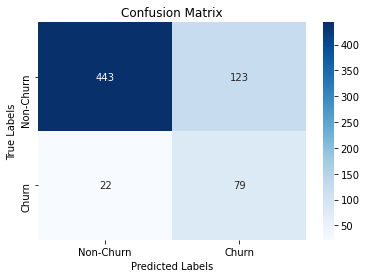

In [91]:
cm = confusion_matrix(y_test, y_pred_smote)

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Churn", "Churn"], yticklabels=["Non-Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

From the data above The model performs well in identifying non-churned customers, with high precision and recall for that class.
The model struggles with predicting churned customers. Although it has a decent recall for churned customers (0.78), its precision is low (0.39), meaning many of the predicted churns are false positives.


### Random Forest

In [94]:
# Initialize the Random Forest model
rf_model_smote = RandomForestClassifier(random_state=42)

# Train the model on the resampled training data
rf_model_smote.fit(x_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_rf_smote = rf_model_smote.predict(x_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[561   5]
 [ 33  68]]

Classification Report:
              precision    recall  f1-score   support

       False       0.94      0.99      0.97       566
        True       0.93      0.67      0.78       101

    accuracy                           0.94       667
   macro avg       0.94      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667


Accuracy:
0.9430284857571214


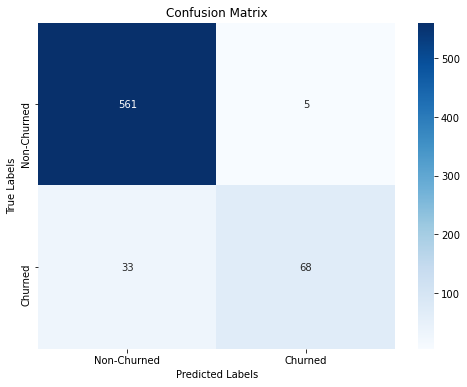

In [96]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Generate confusion matrix for the predictions
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churned', 'Churned'], yticklabels=['Non-Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The model is excellent at identifying non-churned customers, with high precision 0.94 and recall 0.99. This means the model correctly classifies almost all non-churned customers.
The model performs well on churned customers as well with a precision of 0.93, the recall 0.67 could be improved. It identifies 67% of churned customers, but 33% are missed (false negatives).
Overall Accuracy: The model achieves a high accuracy of 94%, which is a very good result.

### K-Nearest Neighbour

In [84]:
# Initialize the KNN classifier
knn_smote = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the resampled training data
knn_smote.fit(x_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_knn = knn_smote.predict(x_test_scaled)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

# Accuracy
print("\nAccuracy:")
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
[[459 107]
 [ 22  79]]

Classification Report:
              precision    recall  f1-score   support

       False       0.95      0.81      0.88       566
        True       0.42      0.78      0.55       101

    accuracy                           0.81       667
   macro avg       0.69      0.80      0.71       667
weighted avg       0.87      0.81      0.83       667


Accuracy:
0.8065967016491754


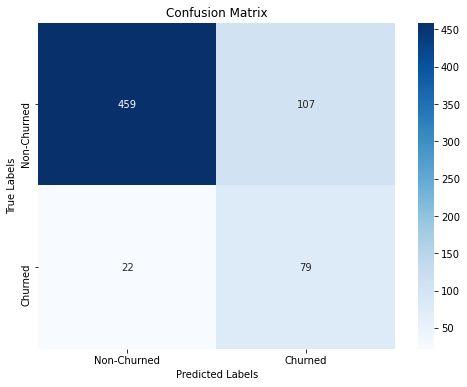

In [97]:
# Generate confusion matrix for the predictions
cm = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churned', 'Churned'], yticklabels=['Non-Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The model performs well for non-churned customers, achieving high precision (0.95) and good recall (0.81). This suggests that the model is very good at correctly predicting customers who will not churn.

The model has moderate recall (0.78) for churned customers, meaning it identifies 78% of actual churned customers. However, the precision for churned customers is only 0.42, meaning many non-churned customers are incorrectly predicted as churned (False Positives). This low precision indicates that the model is not very good at accurately predicting churned customers.

F1-Score: The F1-score for churned customers is 0.55, reflecting a significant imbalance between precision and recall for this class. The model catches most churned customers but has many false alarms (non-churned customers predicted as churned).

### Fine tuning 
We shall improve on the random forest model as it has the highest level of accuracy and prediction

In [90]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30, None],  # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples in a leaf
    'max_features': ['sqrt','log2'],  # Number of features to consider at each split
    'class_weight': ['balanced', None]  # Handle class imbalance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='f1_weighted',  # Optimize for F1-Score to balance precision and recall
                           n_jobs=-1,  # Use all processors
                           verbose=1)

# Fit the model
grid_search.fit(x_train_resampled, y_train_resampled)

# Get best parameters and best model
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters found: ", grid_search.best_params_)

# Predict on the test set using the tuned model
y_pred_rf_smote_tuned = best_rf_model.predict(x_test_scaled)

# Evaluate the tuned model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_smote_tuned))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_smote_tuned))

print("\nAccuracy:")
print(accuracy_score(y_test, y_pred_rf_smote_tuned))


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best Hyperparameters found:  {'class_weight': 'balanced', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Confusion Matrix:
[[550  16]
 [ 21  80]]

Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.97      0.97       566
        True       0.83      0.79      0.81       101

    accuracy                           0.94       667
   macro avg       0.90      0.88      0.89       667
weighted avg       0.94      0.94      0.94       667


Accuracy:
0.9445277361319341


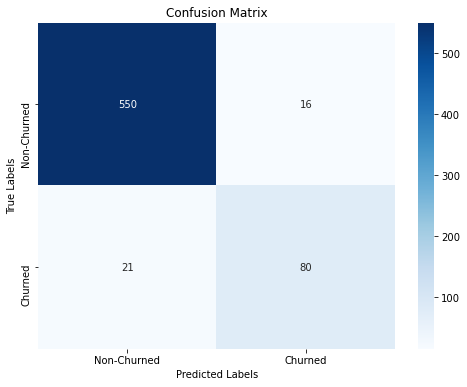

In [98]:
# Generate confusion matrix for the predictions
cm = confusion_matrix(y_test, y_pred_rf_smote_tuned)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Churned', 'Churned'], yticklabels=['Non-Churned', 'Churned'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The model is excellent at identifying non-churned customers, with high precision 0.96 and recall 0.97. This means the model correctly classifies almost all non-churned customers.F1-Score is 0.97 this shows Excellent balance between precision and recall


The model performs well on churned customers as well with a precision of 0.83 and a recall of 0.79 which is an improvement from the previous score of 0.67 improved. F1-Score is now at 0.81 which suggests a good balance between precision and recall, though slightly lower than for the non-churned class

The Accuracy is maintained at 94%

This tuned model is highly effective in identifying
churned customers and is well-suited for the project objective of maximizing the identification of
churned customers to gain insights into the reasons for churn and customer behavior patterns. The
accuracy is also greaater than the project's metric of success which was set at an accuracy of 75%.

### Recommendation:
- The company should look into the charges. There is a strong correlation between the total day, evening, and night charges, and a higher churn rate.
- The company should equip their contact center with the necessary tools and resources to ensure that customer service interactions are satisfying, as a higher number of customer service calls tends to be associated with an increased churn rate. By improving the quality of customer service and addressing issues effectively, the company can reduce the likelihood of customer attrition.
- This Random Forest model, after hyperparameter optimization, achieves high overall performance and strikes a good balance between identifying churned and non-churned customers. It is well-suited for deployment in the churn prediction system, but ongoing monitoring and periodic retraining are recommended to maintain performance over time.